# Пример построения интерактивного графика с использованием библиотеки matplotlib.widgets

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

---


In [1]:
%matplotlib widget
    
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

from matplotlib.widgets import Slider

Команда `%matplotlib ipympl` необходима для того, чтобы интерактивность заработала в jupyter notebook. При использовании Анаконда в первый раз может появиться ошибка `No module named 'ipympl'`. Для устранения этой ошибки надо установить модуль `ipyml`. Это можно сделать запустить Anaconda PowerShell Promt с правами администратора и выполнив команду `conda install -c conda-forge ipympl` или командой `pip install ipyml`

In [2]:
# Решение линейного стока уравнения фильтрации
def pd_ei(rd, td):
  return -1/2*sc.expi(-rd**2 / 4 / td)

Строим интерактивный график

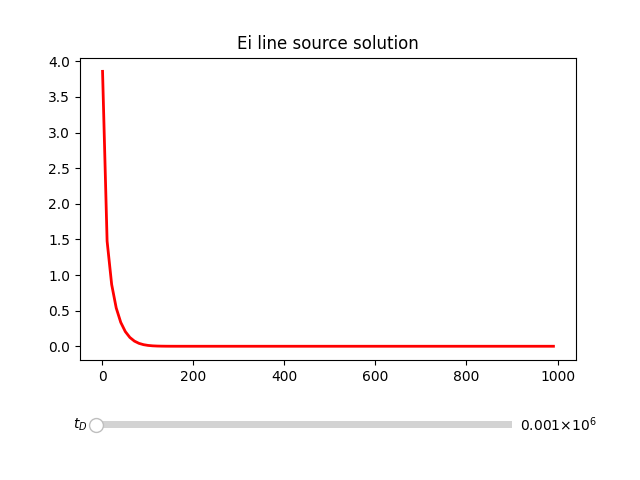

In [3]:
# задаем начальный момент времени для построения графика и диапазон расстояний
td = 1000
rd_range = np.arange(1, 1000, 10)

# создаем график, на котором все будет отрисовываться
fig, ax = plt.subplots()
# освободим снизу немного места для слайдера
plt.subplots_adjust(bottom=0.25)

# строим начальный график и сохраняем ссылку на него в переменной l
l, = plt.plot(rd_range, pd_ei(rd_range, td), lw=2, color='red')

# задаем график
plt.title("Ei line source solution")

# создаем слайдер под графиком
axcolor = 'lightgoldenrodyellow'
axtd = plt.axes([0.15, 0.1, 0.65, 0.03], facecolor=axcolor)
std = Slider(axtd, '$t_D$', 1, 1000000, valinit=td)

# создаем обработчик событий для слайдера, который перерисовывает график при каждом
# изменении значения слайдера
def update(td_val):
    l.set_ydata(pd_ei(rd_range, td_val))
    fig.canvas.draw_idle()
# регистрируем обработчик на слайдере    
std.on_changed(update)

# запускаем отображение графика
plt.show()